In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split

In [2]:
!pip install spacy
!python -m spacy download fr_core_news_md

2021-06-14 17:03:18.494015: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-06-14 17:03:18.494808: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |████████████████████████████████| 47.4 MB 893 kB/s eta 0:00:01


✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')


In [12]:
import spacy
nlp = spacy.load('fr_core_news_md')

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/xavier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/xavier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/xavier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
french_labeled = pd.read_csv('../raw_data/labeled_french_tweets.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 16, saw 2


In [5]:
french = pd.read_csv('../raw_data/french_clean.csv')
french.label.value_counts()

0    25435
1    24565
Name: label, dtype: int64

In [7]:
french.head()

,Unnamed: 0,label,text,clean_text
0,0,0,La peinture me rend achy,le peinture me rendre achy
1,1,0,Les fans de nk ne sont-ils pas les meilleurs? ...,le fan de nk ne être il pas le meilleur je d...
2,2,1,Une autre belle journée. Coincé dans le bureau...,un autre bel journée coincer dans le bureau ...
3,3,0,": Dee, vous avez acheté une autre mini jupe? E...",dee vous avoir acheter un autre mini jup ...
4,4,1,Mon domestique à Hollywood a été éliminé! Trav...,mon domestique à hollywood avoir être éliminer...


In [8]:
french = french.drop(['Unnamed: 0'], axis= 1)

In [9]:
french.head()

,label,text,clean_text
0,0,La peinture me rend achy,le peinture me rendre achy
1,0,Les fans de nk ne sont-ils pas les meilleurs? ...,le fan de nk ne être il pas le meilleur je d...
2,1,Une autre belle journée. Coincé dans le bureau...,un autre bel journée coincer dans le bureau ...
3,0,": Dee, vous avez acheté une autre mini jupe? E...",dee vous avoir acheter un autre mini jup ...
4,1,Mon domestique à Hollywood a été éliminé! Trav...,mon domestique à hollywood avoir être éliminer...


(2000, 3)

0    1000
1    1000
Name: label, dtype: int64

In [16]:
airline = pd.read_csv("../raw_data/Tweets.csv")
print('US airline tweets shape :', airline.shape)

US airline tweets shape : (14640, 15)


In [17]:
airline = airline[['tweet_id','text','airline_sentiment']]

In [18]:
airline.rename({'tweet_id':'textID', 'text':'text', 'airline_sentiment':'sentiment'}, axis='columns', inplace = True)

In [19]:
airline["selected_text"] = 'from airline'

In [20]:
airline = airline[['textID','text', 'selected_text','sentiment']]

In [21]:
airline = airline[airline.sentiment != "neutral"]

In [22]:
airline["sentiment"] = airline["sentiment"].map({'positive' : 1, "negative" : 0})

In [23]:
airline.sentiment.value_counts()

0    9178
1    2363
Name: sentiment, dtype: int64

In [24]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [25]:
#Missing values in training set
train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [26]:
#Missing values in test set
test.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [27]:
train.dropna(axis=0, inplace=True)

In [28]:
train.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [29]:
airline.isna().sum().sort_values(ascending=False) #NaN count for each column

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [30]:
train = train[train.sentiment != "neutral"]
test = test[test.sentiment != "neutral"]


In [31]:
train["sentiment"] = train["sentiment"].map({'positive' : 1, "negative" : 0})

In [32]:
test["sentiment"] = test["sentiment"].map({'positive' : 1, "negative" : 0})

In [33]:
train.sentiment.value_counts()

1    8582
0    7781
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

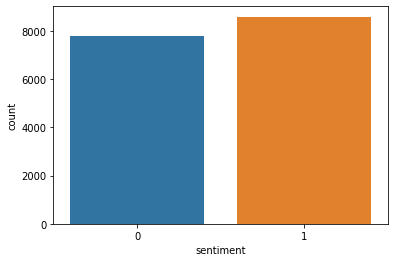

In [34]:
sns.countplot(x='sentiment',data=train)

In [35]:
test.sentiment.value_counts()

1    1103
0    1001
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

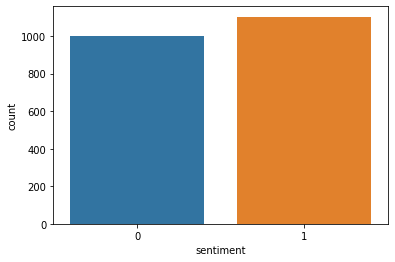

In [36]:
sns.countplot(x='sentiment',data=test)

In [37]:
data = pd.concat([airline, train], axis=0)

In [38]:
data.sentiment.value_counts()

0    16959
1    10945
Name: sentiment, dtype: int64

In [39]:
#train[train['text'].str.contains("\*\*\*\*")]

#train[train['text'].str.contains("\**")|train['text'].str.contains("x*")]

In [40]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import TweetTokenizer
stop = set(stopwords.words('french'))
nlp=spacy.load("fr_core_news_md")

def clean_text(text):
    # lower text
    text = text.lower()
    # remove puncutation
    for punctuation in string.punctuation.replace('#',''):
        text = text.replace(punctuation, ' ')
    # remove words that contain numbers
    text = ''.join(letter for letter in text if not letter.isdigit())
    #tokenization + remove stop words
    doc=nlp(text)
    lemmatized= [token.lemma_ for token in doc]
    # join all
    text = " ".join(lemmatized)
    return text
 
# clean text data
#train["clean_text"] = train["text"].apply(clean_text)

In [41]:
data["clean_text"] = data["text"].apply(clean_text)

In [ ]:
data.to_csv("../raw_data/ata/data_clean.csv", index=False)

In [42]:
french.label.value_counts()

0    771604
1    755120
Name: label, dtype: int64

In [43]:
#french_train_1 = french[0:30000]
#print(french_train_1[:3])
#french_train_1.value_counts()

In [44]:
french_train_1['clean_text'] = french_train_1['text'].apply(clean_text)
french_train_1.head()

,label,text,clean_text
771604,1,"Je vous aime, les gars sont les meilleurs!",je vous aime le gars être le meilleur
771605,1,Je me retrouve avec un de mes besties ce soir!...,je me retrouve avec un de mon bestie ce soir ...
771606,1,"Merci pour l'ajout de Twitter, sunisa! Je dois...",merci pour l ajout de twitter sunisa je de...
771607,1,Être malade peut être vraiment bon marché quan...,être malade pouvoir être vraiment bon marché q...
771608,1,Il a cet effet sur tout le monde,il avoir ce effet sur tout le monde


In [45]:
t = test["text"].apply(clean_text)

In [47]:
train.head()

,textID,text,selected_text,sentiment
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,088c60f138,my boss is bullying me...,bullying me,0
3,9642c003ef,what interview! leave me alone,leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,1


In [50]:
#positive_text = train[train['sentiment'] == 1]['clean_text']
#negative_text = train[train['sentiment'] == 0]['clean_text']

In [ ]:
!pip install wordcloud==1.8.1

In [ ]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])
cloud1 = WordCloud( background_color='white',
                        width=800,
                        height=600).generate(" ".join(positive_text))
ax1.imshow(cloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=35);

cloud2 = WordCloud( background_color='white',
                        width=800,
                        height=600).generate(" ".join(negative_text))
ax2.imshow(cloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=35);

In [ ]:
result = train.text.str.findall('^\*\*\*\*$')

In [ ]:
# train.text.str.findall('https?://\S+|www\.\S+')

In [ ]:
#X= train['clean_text']
#y= train['sentiment']

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42)

In [ ]:
data.sentiment.value_counts()

In [48]:
french_train_1.head()

,label,text,clean_text
771604,1,"Je vous aime, les gars sont les meilleurs!",je vous aime le gars être le meilleur
771605,1,Je me retrouve avec un de mes besties ce soir!...,je me retrouve avec un de mon bestie ce soir ...
771606,1,"Merci pour l'ajout de Twitter, sunisa! Je dois...",merci pour l ajout de twitter sunisa je de...
771607,1,Être malade peut être vraiment bon marché quan...,être malade pouvoir être vraiment bon marché q...
771608,1,Il a cet effet sur tout le monde,il avoir ce effet sur tout le monde


In [51]:
# Iteration for French

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

X= french_train_1['clean_text']
y= french_train_1['label']
model_dict = {'alias' : 'nb',
              'model' : MultinomialNB(),
              'model_name' : "MultinomialNB"}

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    (model_dict['alias'], model_dict['model']),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2), (1,2), (2,3), (3,3)),
    'nb__alpha': (0.1, 1, 10),}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=10)

grid_search.fit(X,y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   21.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        

In [52]:
grid_search.best_score_

0.6950000000000001

In [54]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=10, class_prior=None, fit_prior=True))],
         verbose=False)

In [55]:
grid_search.best_params_

{'nb__alpha': 10, 'tfidf__ngram_range': (1, 1)}

# ML Flow superpower

In [ ]:
!pip install mlflow

In [56]:
import mlflow
from  mlflow.tracking import MlflowClient

mlflow.set_tracking_uri("https://mlflow.lewagon.co/")

EXPERIMENT_NAME = "[FR] [Marseille] [OM-datalab]"

client = MlflowClient()
experiment_id = client.create_experiment(EXPERIMENT_NAME)

run = client.create_run(experiment_id)
client.log_metric(run.info.run_id, "accuracy", grid_search.best_score_)
client.log_param(run.info.run_id, "best_params", grid_search.best_params_)
client.log_param(run.info.run_id, "model", model_dict['model_name'])

In [ ]:
# Iteration with data merge

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

X= data['clean_text']
y= data['sentiment']

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2), (1,2), (2,3), (3,3)),
    'nb__alpha': (0.1, 1, 10),}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=10)

grid_search.fit(X,y)

In [ ]:
grid_search.best_score_

In [ ]:
# 1st iteration
# First iteration 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

X= train['clean_text']
y= train['sentiment']

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2), (1,2), (2,3), (3,3)),
    'nb__alpha': (0.1, 1, 10),}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=10)

grid_search.fit(X,y)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
X_test = t
y_test = test['sentiment']
pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
baseline_score = pred
grid_search.best_estimator_.score(X_test, y_test)

In [ ]:
# 2nd iteration
# Fine tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

X= train['clean_text']
y= train['sentiment']

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2), (1,2), (2,3), (3,3)),
    'nb__alpha': (0.1, 0.5, 1, 5, 10),}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "f1", 
                           refit=True, cv=10)

grid_search.fit(X,y)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)

In [ ]:
doc = nlp(u"voudrais non animaux yeux dors couvre.")
for token in doc:
    print(token, token.lemma_)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce82c844-fa70-433d-b480-148c6a0f0f8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>